In [1]:
from tspqaoa import optimization, qls, utils
import networkx as nx
import numpy as np
import random
from qiskit.visualization import plot_histogram
from tspqaoa.optimization import get_optimized_angles, run_qaoa
from tspqaoa.qaoa import get_tsp_qaoa_circuit
from tspqaoa.utils import format_from_onehot, unformat_to_onehot
from qiskit.providers.aer import AerSimulator

{(0, 1): Text(0.2633768680670205, 0.6077139507167097, '0.8377207654559273'),
 (0, 2): Text(0.08120393182298463, -0.01810083867427731, '0.7504297753597957'),
 (0, 3): Text(0.7074794759861364, 0.01277765554273183, '0.8534322810310301'),
 (0, 4): Text(0.24593252227778006, -0.20481222833463664, '0.9920510492058981'),
 (0, 5): Text(0.4319184923809102, 0.003327006647957209, '0.5895203700249787'),
 (0, 6): Text(0.054048616100831975, 0.42254735068549953, '0.6297712492809149'),
 (0,
  7): Text(-0.20866870591453474, -0.14826002125129034, '0.14169234644802486'),
 (0, 8): Text(0.22725721543366442, 0.13984749900767698, '0.6103795641641839'),
 (0,
  9): Text(-0.14271260826570237, 0.27265911691289124, '0.42285393292774953'),
 (1, 2): Text(-0.0703781520822676, 0.31768823922911693, '0.21639177857968128'),
 (1, 3): Text(0.5558973920808842, 0.3485667334461261, '0.033466811341618885'),
 (1, 4): Text(0.09435043837252782, 0.1309768495687576, '0.20441115894337958'),
 (1, 5): Text(0.28033640847565794, 0.33911

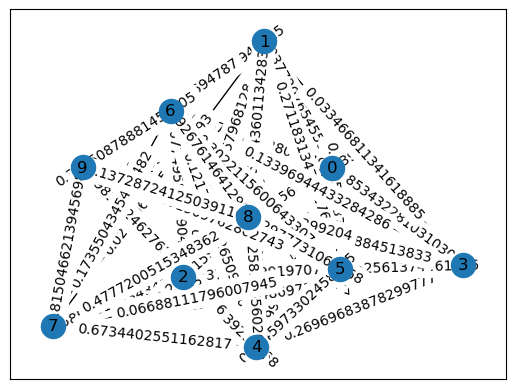

In [2]:
G = nx.complete_graph(10)
for (u,v,w) in G.edges(data=True):
    w['weight'] = random.random()

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

In [3]:
state_gpu = qls.qls_main_subroutine(G, [0,1,2,3,4,5,6,7,8,9], [2,3,4],device="GPU")

path pieces: [[5, 6, 7, 8, 9, 0, 1]]
init state:  [1, 2, 3, 4, 5]
updated untranslated qls state:  [3, 0, 1, 2, 4]
updated global state:  [4, 1, 2, 3, 5]


In [4]:
state_cpu = qls.qls_main_subroutine(G, [0,1,2,3,4,5,6,7,8,9], [2,3,4],device="CPU")

init state:  [1, 2, 3, 4, 5]
path pieces: [[5, 6, 7, 8, 9, 0, 1]]
updated qls state:  [4, 1, 2, 3, 5]
updated global state:  [4, 1, 2, 3, 5]


In [ ]:
benchmark_state = qls.benchmark_main_subroutine(G, [0,1,2,3,4,5,6,7,8,9], [2,3,4])

init state:  [1, 2, 3, 4, 5]
path pieces: [[5, 6, 7, 8, 9, 0, 1]]
updated qls state:  [1, 5, 2, 4, 3]
updated global state:  [1, 0, 9, 8, 7, 6, 5, 2, 4, 3]
